In [3]:
] st

Status `~/research2/15_2025_summer/dynamic_rrts/Project.toml`
  [864edb3b] DataStructures v0.18.22
  [c4b27c1d] Dubins v1.2.0
  [91a5bcdd] Plots v1.40.17
  [90137ffa] StaticArrays v1.9.14
  [a759f4b9] TimerOutputs v0.5.29


In [4]:
include("src/spatial_hash_maps2.jl")

Main.SpatialHashMaps

In [5]:
using Dubins

In [231]:
using StaticArrays, LinearAlgebra, Plots
using .RRTStar
using Random

In [232]:
Random.seed!(0)

min_domain = SVector(0, 0.0, -π)
max_domain = SVector(1.0, 1.0, π)
domain = (min_domain, max_domain)

static_obstacles = [DubinsDynamicPathRRT.random_static_obstacle() for i=1:2]
dynamic_obstacles = [
    DubinsDynamicPathRRT.DynamicCircleObstacle(
        t -> SVector(0.5 + 0.5 * sin(-t), 0.3), 
        0.1), 

    DubinsDynamicPathRRT.DynamicCircleObstacle(
        t -> SVector(sin(t + π/4), 0.6), 
        0.1), 

    DubinsDynamicPathRRT.DynamicCircleObstacle(
        t -> SVector(sin(t - π/4), 0.9), 
        0.1)
    ]

goal_state = SVector(1, 1.0, 0.0)
turning_radius = 0.1
rrt_problem = DubinsDynamicPathRRT.DubinsDynamicRRTProblem(domain, 0.1, static_obstacles, dynamic_obstacles, goal_state)

Main.DubinsDynamicPathRRT.DubinsDynamicRRTProblem{Float64, Main.DubinsDynamicPathRRT.CircleObstacle{Float64}, Main.DubinsDynamicPathRRT.DynamicCircleObstacle{C, Float64, Tuple{Float64, Float64}} where C}(([0.0, 0.0, -3.141592653589793], [1.0, 1.0, 3.141592653589793]), 0.1, Main.DubinsDynamicPathRRT.CircleObstacle{Float64}[Main.DubinsDynamicPathRRT.CircleObstacle{Float64}([0.4056994708920292, 0.06854582438651502], 0.172428171439097), Main.DubinsDynamicPathRRT.CircleObstacle{Float64}([0.08597086585842195, 0.6616126907308237], 0.0232654707663172)], Main.DubinsDynamicPathRRT.DynamicCircleObstacle{C, Float64, Tuple{Float64, Float64}} where C[Main.DubinsDynamicPathRRT.DynamicCircleObstacle{var"#421#424", Float64, Tuple{Float64, Float64}}(var"#421#424"(), 0.1, (-Inf, Inf)), Main.DubinsDynamicPathRRT.DynamicCircleObstacle{var"#422#425", Float64, Tuple{Float64, Float64}}(var"#422#425"(), 0.1, (-Inf, Inf)), Main.DubinsDynamicPathRRT.DynamicCircleObstacle{var"#423#426", Float64, Tuple{Float64, Fl

In [233]:
start_state = SVector(0.0, 0.0, 0.0, 0.0)

4-element SVector{4, Float64} with indices SOneTo(4):
 0.0
 0.0
 0.0
 0.0

In [265]:
Random.seed!(0)
widths = SVector(0.1, 0.1) # only spatial hashing - ignoring the temporal dimension of the state
sol = RRTStar.setup(rrt_problem, start_state, widths)

Main.RRTStar.RRTStarSolution{SVector{4, Float64}, 2, Float64, Main.RRTStar.SolutionStatus}(Main.RRTStar.Node{SVector{4, Float64}}([0.0, 0.0, 0.0, 0.0], CartesianIndex(0,), 0.0, Set{CartesianIndex{1}}(), false), Main.SpatialHashMaps.SpatialHashMap{2, Float64, Main.RRTStar.Node{SVector{4, Float64}}}, nothing, Main.RRTStar.NotSolved)

In [266]:
@time RRTStar.solve!(rrt_problem, sol; 
    max_iterations=1000, 
    max_time_seconds=1.0, 
    do_rewire=true, 
    early_exit=true,
    goal_bias=0.1);

  0.035695 seconds (333.21 k allocations: 15.271 MiB)


In [267]:
sol.status

GoalReachable::SolutionStatus = 0

In [268]:
sol.hash_map

SpatialHashMap{2, Float64, Main.RRTStar.Node{SVector{4, Float64}}}
 - origin   : [0.0, 0.0]
 - widths   : [0.1, 0.1]
 - cells    : 35
 - elements : 57


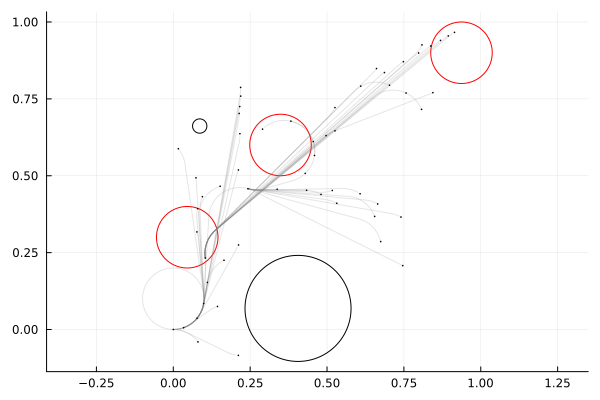

In [269]:
plot()
for o in rrt_problem.static_obstacles
    plot_obstacle!(o, color=:black)
end
τ = 2.0
for o in rrt_problem.dynamic_obstacles
    plot_dynamic_obstacle!(o, τ, color=:red)
end
# scatter_plot_hashmap!(sol.hash_map; label=false)
plot_tree!(rrt_problem, sol)

plot_tree_dynamic!(rrt_problem, sol, τ)

L = 0.6811149172182928
t_child = 0.1411835947570734
t_node = 0.08838720825673922
t_child - t_node = 0.05279638650033418
x_node = [0.07732001967265256, 0.036583798932602246, 0.8838720825673922]
x_child = [0.09873923803601742, 0.08417082212916002, 1.4118359475707338]
path = DubinsPath{Float64}([0.07732001967265256, 0.036583798932602246, 0.8838720825673922], [6.225416685284615, 0.0, 0.5857324868983123], 0.1, LRL)
idk what happened, skipping
L = 0.6811149172182928
t_child = 0.1411835947570734
t_node = 0.08838720825673922
t_child - t_node = 0.05279638650033418
x_node = [0.07732001967265256, 0.036583798932602246, 0.8838720825673922]
x_child = [0.09873923803601742, 0.08417082212916002, 1.4118359475707338]
path = DubinsPath{Float64}([0.07732001967265256, 0.036583798932602246, 0.8838720825673922], [6.225416685284615, 0.0, 0.5857324868983123], 0.1, LRL)
idk what happened, skipping


[ Plots | Info ] : Saved animation to /Users/devanshagrawal/research2/15_2025_summer/dynamic_rrts/tmp.gif


Plots.AnimatedGif("/Users/devanshagrawal/research2/15_2025_summer/dynamic_rrts/tmp.gif")
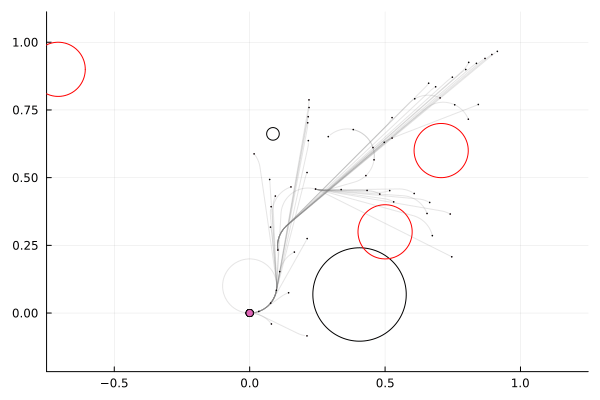

In [270]:
@gif for t in range(0.0, 2.0, length=60)
    plot()
    for o in rrt_problem.static_obstacles
        plot_obstacle!(o, color=:black)
    end
    for o in rrt_problem.dynamic_obstacles
        plot_dynamic_obstacle!(o, t, color=:red)
    end
    # scatter_plot_hashmap!(sol.hash_map; label=false)
    plot_tree!(rrt_problem, sol)
    
    plot_tree_dynamic!(rrt_problem, sol, t)

    xlims!(-0.75, 1.25)
end

In [259]:
c = 0
for el in sol.hash_map
    if el.is_invalid
        c += 1 
    end
end
c 

24

In [260]:
; open /Users/devanshagrawal/research2/15_2025_summer/dynamic_rrts